#  < 곱셈 >

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("./data/math_func_type.xlsx",sheet_name=2, encoding='utf-8')

In [3]:
len(df)

120

In [4]:
plus = df['키워드1'].values

## 1. 정수인코딩

In [5]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from konlpy.tag import Kkma  
from konlpy.tag import Okt  

# 정제와 단어 토큰화
vocab={} # 파이썬의 dictionary 자료형
sentences = []
stop_words =', '

kkma=Kkma()
okt=Okt()  

for i in range(len(plus)):
    sentence = okt.morphs(plus[i])
    result = []

    for word in sentence: 
        word=word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
            if len(word) > 0: # 단어 길이가 1이하인 경우에 대하여 추가로 단어를 제거합니다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0 
                vocab[word] += 1
    sentences.append(result) 
print(sentences)

[['씩', '모두', '몇'], ['씩', '몇'], ['씩', '씩', '모두', '몇'], ['씩', '씩', '모두', '몇'], ['씩', '는', '의', '만큼', '모두', '몇'], ['씩', '남은', '몇'], ['씩', '씩', '모두', '부족해', '나머지', '씩', '몇', '필요합니까'], ['모두', '그', '중', '에서', '씩', '남은', '몇'], ['월', '일', '주일', '후', '몇', '월', '몇', '일'], ['씩', '씩', '몇'], ['씩', '씩', '몇'], ['씩', '씩', '모두', '몇'], ['의', '씩', '의', '씩', '나머지', '의', '씩', '각', '상자', '에서', '씩', '남은', '종이', '모두', '몇'], ['과', '이', '각각', '씩', '씩', '씩', '모두', '몇', '필요합니까'], ['씩', '더', '모두', '몇'], ['씩', '남는', '몇'], ['씩', '모두', '몇'], ['씩', '모두', '몇'], ['주일', '모두', '며칠'], ['씩', '씩', '씩', '몇'], ['씩', '씩', '모두', '몇'], ['주일', '모두', '며칠'], ['씩', '모두', '몇'], ['씩', '씩', '모두', '몇'], ['의', '씩', '의', '씩', '모두', '몇'], ['씩', '씩', '에', '은', '씩', '는', '씩', '는', '모두', '몇', '가', '필요합니까', '(', '단', '따로'], ['씩', '더', '부족', '몇'], ['씩', '씩', '몇'], ['월', '일', '주일', '후', '몇', '월', '몇', '일'], ['씩', '짓지', '못', '하는', '몇'], ['씩', '이', '중', '몇', '남은'], ['월', '일', '주일', '후', '몇', '월', '며칠'], ['중', '와', '모두', '몇'], ['씩', '모두', '씩', '나눠',

In [6]:
vocab_sorted=sorted(vocab.items(), key=lambda x:x[1], reverse=True)

In [7]:
print(vocab_sorted)

[('씩', 116), ('몇', 110), ('모두', 73), ('는', 60), ('의', 52), ('에', 35), ('배', 25), ('더', 24), ('개', 23), ('점', 14), ('보다', 11), ('만큼', 10), ('이', 9), ('은', 9), ('많이', 9), ('일', 8), ('주일', 8), ('와', 8), ('남은', 7), ('동안', 7), ('중', 6), ('월', 6), ('각형', 6), (':,', 6), ('필요합니까', 5), ('에서', 5), ('바퀴', 5), ('짜리', 5), ('을', 5), ('며칠', 4), ('가', 4), ('수', 4), ('다리는', 4), ('명의', 4), ('번', 4), ('누구', 4), ('누가', 4), ('나머지', 3), ('후', 3), ('에는', 3), ('어느', 3), ('많습니까', 3), ('그', 2), ('각각', 2), ('자동차', 2), ('가위바위보', 2), ('손가락', 2), ('필요한지', 2), ('자전거', 2), ('오토바이', 2), ('승용차', 2), ('배는', 2), ('대', 2), ('것', 2), ('곱', 2), ('많은지', 2), ('많습니다', 2), ('부족해', 1), ('각', 1), ('상자', 1), ('종이', 1), ('과', 1), ('남는', 1), ('(', 1), ('단', 1), ('따로', 1), ('부족', 1), ('짓지', 1), ('못', 1), ('하는', 1), ('나눠', 1), ('팔았다', 1), ('먹었습니다', 1), ('남아', 1), ('있는', 1), ('들어있는', 1), ('남았습니다', 1), ('보', 1), ('수의', 1), ('합', 1), ('가위', 1), ('이겼을', 1), ('때', 1), ('당', 1), ('먹었다면', 1), ('매일', 1), ('인', 1), ('이어', 1), ('붙였습니다', 1), ('전

In [8]:
word_to_index={}
i=0
for (word, frequency) in vocab_sorted :
    if frequency > 0 : # 정제(Cleaning) 챕터에서 언급했듯이 빈도수가 적은 단어는 제외한다.
        i=i+1
        word_to_index[word]=i
print(word_to_index)

{'씩': 1, '몇': 2, '모두': 3, '는': 4, '의': 5, '에': 6, '배': 7, '더': 8, '개': 9, '점': 10, '보다': 11, '만큼': 12, '이': 13, '은': 14, '많이': 15, '일': 16, '주일': 17, '와': 18, '남은': 19, '동안': 20, '중': 21, '월': 22, '각형': 23, ':,': 24, '필요합니까': 25, '에서': 26, '바퀴': 27, '짜리': 28, '을': 29, '며칠': 30, '가': 31, '수': 32, '다리는': 33, '명의': 34, '번': 35, '누구': 36, '누가': 37, '나머지': 38, '후': 39, '에는': 40, '어느': 41, '많습니까': 42, '그': 43, '각각': 44, '자동차': 45, '가위바위보': 46, '손가락': 47, '필요한지': 48, '자전거': 49, '오토바이': 50, '승용차': 51, '배는': 52, '대': 53, '것': 54, '곱': 55, '많은지': 56, '많습니다': 57, '부족해': 58, '각': 59, '상자': 60, '종이': 61, '과': 62, '남는': 63, '(': 64, '단': 65, '따로': 66, '부족': 67, '짓지': 68, '못': 69, '하는': 70, '나눠': 71, '팔았다': 72, '먹었습니다': 73, '남아': 74, '있는': 75, '들어있는': 76, '남았습니다': 77, '보': 78, '수의': 79, '합': 80, '가위': 81, '이겼을': 82, '때': 83, '당': 84, '먹었다면': 85, '매일': 86, '인': 87, '이어': 88, '붙였습니다': 89, '전체': 90, '에게': 91, '열': 92, '리지': 93, '않은': 94, '열린': 95, '8': 96, '까지': 97, '두발': 98, '세': 99, '발': 100, '차': 101

In [9]:
word_to_index['OOV']=len(word_to_index)+1

In [10]:
encoded=[]
for s in sentences:
    temp = []
    for w in s:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[1, 3, 2], [1, 2], [1, 1, 3, 2], [1, 1, 3, 2], [1, 4, 5, 12, 3, 2], [1, 19, 2], [1, 1, 3, 58, 38, 1, 2, 25], [3, 43, 21, 26, 1, 19, 2], [22, 16, 17, 39, 2, 22, 2, 16], [1, 1, 2], [1, 1, 2], [1, 1, 3, 2], [5, 1, 5, 1, 38, 5, 1, 59, 60, 26, 1, 19, 61, 3, 2], [62, 13, 44, 1, 1, 1, 3, 2, 25], [1, 8, 3, 2], [1, 63, 2], [1, 3, 2], [1, 3, 2], [17, 3, 30], [1, 1, 1, 2], [1, 1, 3, 2], [17, 3, 30], [1, 3, 2], [1, 1, 3, 2], [5, 1, 5, 1, 3, 2], [1, 1, 6, 14, 1, 4, 1, 4, 3, 2, 31, 25, 64, 65, 66], [1, 8, 67, 2], [1, 1, 2], [22, 16, 17, 39, 2, 22, 2, 16], [1, 68, 69, 70, 2], [1, 13, 21, 2, 19], [22, 16, 17, 39, 2, 22, 30], [21, 18, 3, 2], [1, 3, 1, 71, 38, 3, 2], [1, 1, 3, 1, 2, 25], [14, 1, 14, 1, 13, 21, 26, 18, 72, 19, 2], [44, 18, 1, 3, 2], [1, 43, 21, 26, 73, 74, 75, 3, 2], [4, 1, 4, 1, 18, 6, 76, 3, 2], [1, 77, 1, 3, 2], [45, 27, 5, 32], [6, 1, 6, 3, 2], [14, 10, 14, 10, 14, 10, 13, 13, 13, 3, 2, 10], [4, 6, 1, 4, 6, 1, 18, 3, 2], [6, 1, 6, 3, 2], [5, 33, 9, 5, 33, 3, 2], [13, 1, 13, 3, 2], [

In [11]:
max_len=max(len(l) for l in encoded) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 18


In [12]:
min_len=min(len(l) for l in encoded) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최소 길이 : {}'.format(min_len))

샘플의 최소 길이 : 2


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

In [14]:
sequences = pad_sequences(encoded, maxlen=max_len, padding='pre')

In [15]:
print(sequences)


[[ 0  0  0 ...  1  3  2]
 [ 0  0  0 ...  0  1  2]
 [ 0  0  0 ...  1  3  2]
 ...
 [ 0  0  0 ...  8 15 36]
 [ 0  0  0 ...  3  2  9]
 [ 0  0  0 ...  8  3  2]]


In [16]:
df_1 = pd.DataFrame(columns=('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'))

In [17]:
for i in range(120):
    df_1.loc[i] = sequences[i]

In [18]:
df_1.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,2
4,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,12,3,2


In [19]:
data_points = df_1.values

## 2. k-means
* elbow curve
* 8개의 군집 설정

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
def elbow(X):
    sse=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i,init="k-means++",random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1, 11),sse,marker="o")
    plt.show()


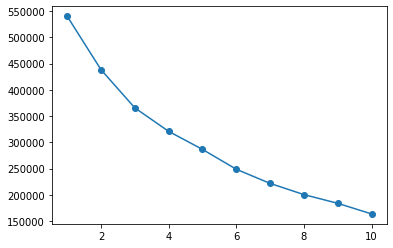

In [22]:
elbow(data_points)

In [23]:
kmeans = KMeans(n_clusters = 8).fit(data_points)

In [24]:
df_1['cluster_id'] = kmeans.labels_

In [25]:
df_1.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,cluster_id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,2,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,2,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,2,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,12,3,2,0


In [26]:
df_1['cluster_id']

0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    4
117    4
118    5
119    0
Name: cluster_id, Length: 120, dtype: int32

(array([65.,  2.,  1.,  0., 16., 17.,  0.,  8.,  4.,  7.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

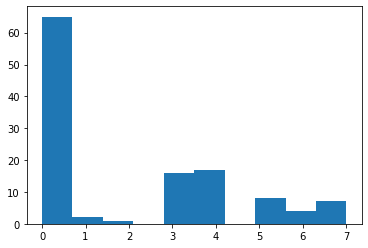

In [27]:
plt.hist(df_1['cluster_id'])

In [28]:
for i in range(len(df)):
    if df_1['cluster_id'][i]==1:
        print(df['질문'][i])

한 장의 길이가 4cm인 색 테이프 4장을 그림과 같이 겹치지 않게 이어 붙였습니다. 이어 붙인 색 테이프의 전체 길이는 몇 cm인지 풀이 과정을 쓰고, 답을 구하시오. 
사과가 열리지 않은 사과나무가 5그루 있습니다. 이 사과나무에 열린 사과는 몇 개인지 풀이 과정을 쓰고, 답을 구하시오. 


## 3. 워드투벡터

In [83]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

In [89]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8,6))
    plt.scatter(xs, ys, marker = 'o')
#     xlim()
#     ylim(-0.01,0.103)
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [90]:
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

In [91]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47751 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 47751 missing from current font.
  font.load_char(ord(

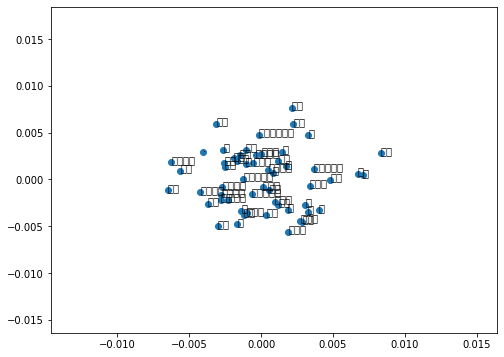

In [93]:
plot_2d_graph(vocabs, xs,ys)

In [27]:
model_result=model.wv.most_similar("넣었더니")
print(model_result)

[('하였더니', 0.16048750281333923), ('이', 0.1238383948802948), ('전체', 0.08498884737491608), ('많을까', 0.08361440896987915), ('씩', 0.07386093586683273), ('그', 0.07097120583057404), ('줬습니다', 0.07074728608131409), ('나오고', 0.0665823370218277), ('더', 0.05773638188838959), ('버려야', 0.0551939532160759)]
